In [20]:
from physics.zsr import ZAxisSuperResolution
from configs.ve import BMR_ZSR_256 as configs
import datasets
config = configs.get_config()
scaler = datasets.get_data_scaler(config)
zsr_factor = 2
forward_op = ZAxisSuperResolution(zsr_factor)

Loading all data ...
Data loaded shape: torch.Size([256, 1, 256, 256]), min: -0.013267766684293747, max: 1.0015524625778198
Note: please check the data range is in about [0, 1]


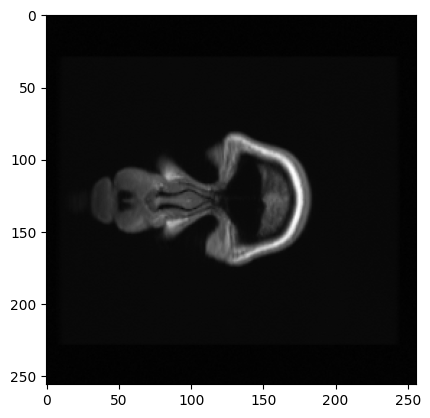

In [21]:
import tpdm_utils as tutils
from pathlib import Path
import matplotlib.pyplot as plt

label_path = Path('/home/czfy/tpdm/dataset_sample/BMR_256_synthetic_0')
label, fname_list = tutils.load_tpdm_label_data(label_path)
label = scaler(label)
plt.imshow(label[50,0,:,:,].cpu(), cmap='gray')


tensor(0.2128)


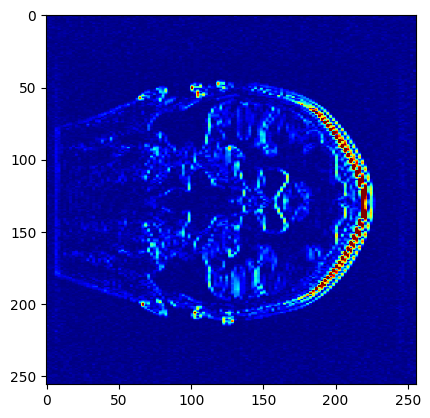

In [36]:
measure = forward_op.A(label)
measure_dagger = forward_op.A_dagger(measure)
max_v = (label-measure_dagger).abs()[150,0,:,:,].max()
print(max_v)
plt.imshow((label-measure_dagger).abs()[150,0,:,:,].cpu()*2/max_v, cmap='jet',vmin=0.0,vmax=1.0)
